In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv('Datasets/Interview/train.csv')
sales

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [3]:
sales['Sales'] = sales['Sales'].apply(lambda x: float(x.replace(',', '.')))

sales

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


### Task 1

 а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [4]:
sales['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

### Answer
Binders
Paper
Furnishings
Phones
Storage


In [5]:
sales['Date Year'] = sales['Order Date'].apply(lambda x: int(x.split(r'/')[-1]))
sales

,ID,Order Date,Class,Region,Sub-Category,Sales,Date Year
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080,2018
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610,2018
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860,2018
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000,2018
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130,2018
...,...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472,2015
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050,2015
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810,2015
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085,2015


In [6]:
sales['Date Year'].value_counts()

Date Year
2018    3258
2017    2534
2016    2055
2015    1953
Name: count, dtype: int64

б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [7]:
sales[sales['Date Year'] > 2016]['Sub-Category'].value_counts()


Sub-Category
Binders        900
Paper          809
Furnishings    557
Phones         510
Storage        490
Art            458
Accessories    450
Chairs         348
Appliances     274
Labels         208
Tables         189
Bookcases      130
Envelopes      130
Fasteners      121
Supplies       117
Machines        65
Copiers         36
Name: count, dtype: int64

### Answer
Binders
Paper
Furnishings
Phones
Storage

в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [8]:
sales[sales['Date Year'] == 2018]['Sub-Category'].value_counts()

Sub-Category
Binders        492
Paper          452
Furnishings    310
Phones         290
Storage        281
Art            279
Accessories    266
Chairs         187
Appliances     161
Labels         113
Tables         104
Bookcases       76
Envelopes       71
Fasteners       63
Supplies        58
Machines        33
Copiers         22
Name: count, dtype: int64

### Answer
Binders
Paper
Furnishings
Phones
Storage

Вывод: первым делом преобразуем продажи в числа, но это не нужно для 1 задания, т.к. вопрос стоит в частоте (кол-во \ промежуток)
Достаточно было посчитать кол-во подгрупп по условиям и отсортировать их

### Task 2
Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Sub-Category', ylabel='Sales'>

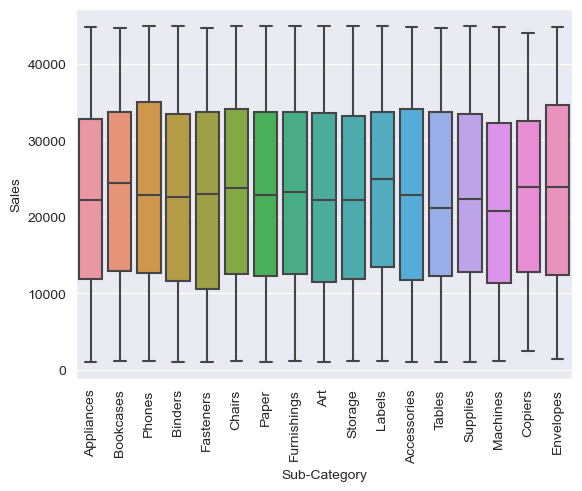

In [10]:
plt.xticks(rotation=90)
sns.boxplot(y=sales['Sales'], x=sales['Sub-Category'])

C:\Users\sanya\anaconda3\envs\Sandbox\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


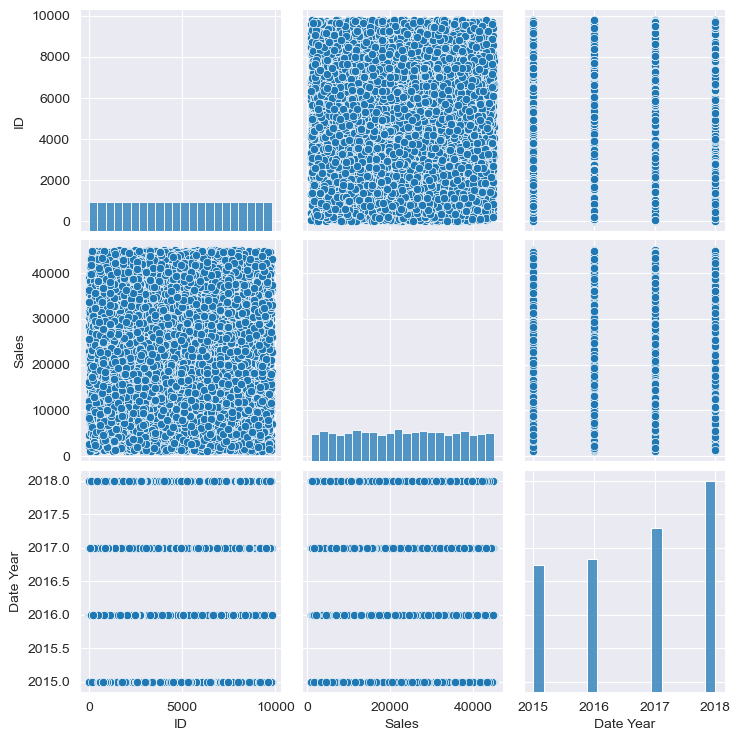

In [11]:
sns.pairplot(sales)

По всем графикам и невооруженным глазом видно, что в данных отсуствуют какие либо аномалии и выбросы

### Task 3

In [12]:
sales['Sales'].describe()

count     9800.000000
mean     22921.757737
std      12601.999815
min       1002.794000
25%      12135.625000
50%      22882.060000
75%      33730.130000
max      44995.410000
Name: Sales, dtype: float64

Разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales Так и сделаем)

In [13]:
def category_sales(cost: float) -> str:
    if cost < 12_135:
        return 'Low'
    elif 12_135 < cost < 33_730:
        return 'Medium'
    else:
        return 'High'

In [14]:
sales['Sale_group'] = np.vectorize(category_sales)(sales['Sales'])
sales

,ID,Order Date,Class,Region,Sub-Category,Sales,Date Year,Sale_group
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080,2018,High
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610,2018,Medium
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860,2018,High
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000,2018,Low
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130,2018,Medium
...,...,...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472,2015,Low
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050,2015,Medium
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810,2015,Medium
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085,2015,Low


Сгруппировать данные на основе региона и группы продаж (Region, Sale_group).

In [15]:
region_sales = sales.groupby(['Region', 'Sale_group'], as_index=False)['Sales'].sum()
region_sales.sort_values(by='Sales', ascending=False)

,Region,Sale_group,Sales
5,Калиниград,Medium,3.704991e+07
2,Владивосток,Medium,3.107764e+07
3,Калиниград,High,2.981133e+07
0,Владивосток,High,2.823214e+07
11,Урал,Medium,2.606684e+07
9,Урал,High,2.194230e+07
8,Москва,Medium,1.804466e+07
6,Москва,High,1.633080e+07
4,Калиниград,Low,5.069059e+06
1,Владивосток,Low,4.642905e+06


После сортировке по общим продажам видно, что тендеция от малой группы к высшей, однако прибыльнее оказывается средняя группа (medium) в силу своего распределения ее больше по сумме как high + medium.

В свою очередь high не смотря на меньшее количество образцов показывает свою тендецию от названия High -> находится почти в топе, Low -> на дне.

По городам самыми прибыльными являются Калининград и Владивосток как минимум из-за того что в них присутсвуют сразу 3 группы.